In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

## Background:

This notebook gives a quick and dirty example of using a notch filter to remove noise from time series signals.

Two sine waves are generated below. One at 50 Hz (f1) and a second at 250 Hz (f2). f2 is also twice the amplitude of f1. The two sine waves are then added together.

There is 1 second worth of data (1000 samples / sampling rate)

Note: Sampling rate is 1000 Hz.

In [2]:
sr = 1000
f1 = 50
f2 = 250
t = np.arange(1000) / sr


y1 = np.sin(2 * np.pi * f1 * t)
y2 = 1.5 * np.sin(2 * np.pi * f2 * t)
sig = y1 + y2

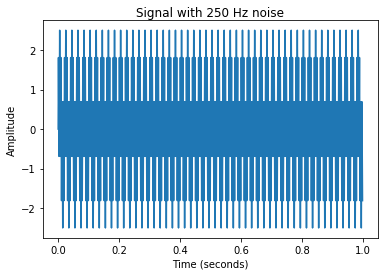

In [3]:
plt.plot(t, sig);
plt.title('Signal with 250 Hz noise')
plt.xlabel('Time (seconds)');
plt.ylabel('Amplitude');

## Frequency space:

The frequencies and their associated power (amount of contribution) within the time series are shown using Welch's method. This method uses a sliding window that moves along the time series and calculates a fourier transform that incorporates n samples then moves on to the next n samples. 

The fourier transforms are then averaged together to give an estimate of the powers of the frequencies within the time series.

Two spikes are present. One at 50 Hz and a second at 250.
Note: There's some spectral "leakage" (frequency estimation error) likely due to the small number of samples used and windowing function. 

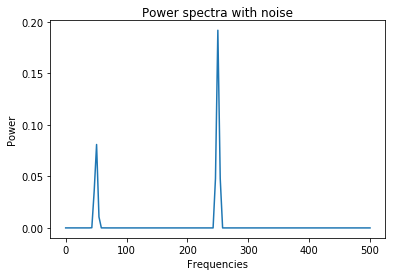

In [4]:
#Compute power using welch's method
freqs, psd = signal.welch(sig, fs = sr)

plt.plot(freqs, psd)
plt.title('Power spectra with noise')
plt.xlabel('Frequencies');
plt.ylabel('Power');

## Filtering

The coefficents for the notch filter using an infinite impulse response are calculated. They describe the frequencies to be removed - translating from frequency space to time space.

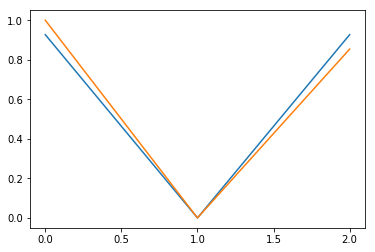

In [5]:
#Filter out the 250 Hz signal using notch filter
w0 = f2 / (sr/2)
q = 10.0
b, a = signal.iirnotch(w0, q)
plt.plot(b);
plt.plot(a);

The filter is then applied to each point in the data, using a weighted sum of the coefficients that remove the "noise" frequency.

In [6]:
filt_sig = signal.filtfilt(b, a, sig, padlen = 24)

## The effects of filtering

A second power spectra is calculated to see the effect the filter had on the data.

Like mathemagic the 250 Hz signal has been removed!

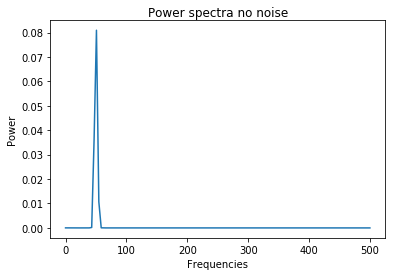

In [7]:
#Compute filtered power
filt_freqs, filt_psd = signal.welch(filt_sig, fs = sr)

plt.plot(filt_freqs, filt_psd)
plt.title('Power spectra no noise')
plt.xlabel('Frequencies');
plt.ylabel('Power');

## All together now

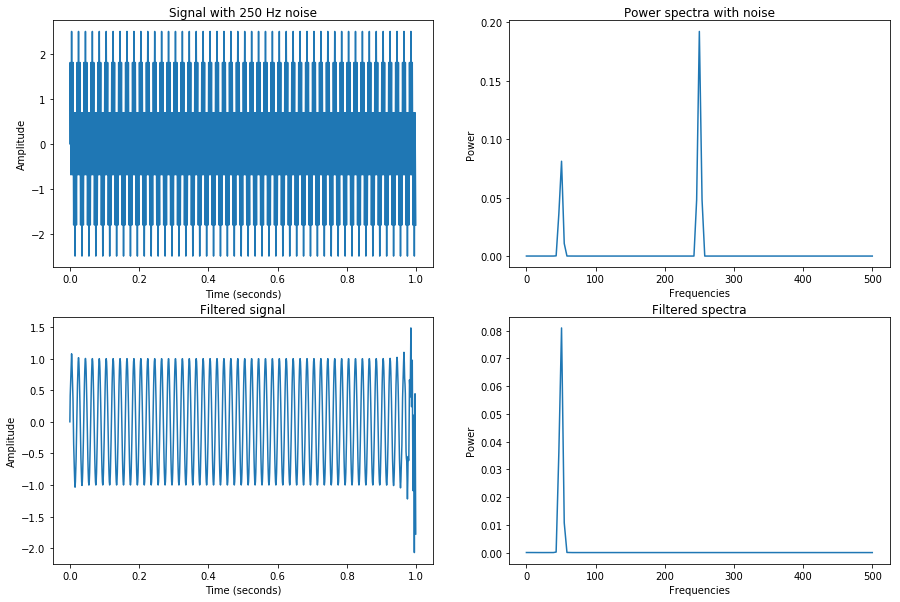

In [8]:
#PLOT!

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.plot(t, sig)
plt.title('Signal with 250 Hz noise')
plt.xlabel('Time (seconds)');
plt.ylabel('Amplitude');

plt.subplot(2,2,2)
plt.plot(freqs, psd)
plt.title('Power spectra with noise')
plt.xlabel('Frequencies');
plt.ylabel('Power');

plt.subplot(2,2,3)
plt.plot(t, filt_sig)
plt.title('Filtered signal')
plt.xlabel('Time (seconds)');
plt.ylabel('Amplitude');

plt.subplot(2,2,4)
plt.plot(filt_freqs, filt_psd)
plt.title('Filtered spectra')
plt.xlabel('Frequencies');
plt.ylabel('Power');

## Prologue:

As the dust clears at the end of the time series wars, notch filter remains standing victoriously. It has vanquished the interloper noise signal while keeping safe the rightful heir to the frequency throne. None have escaped unharmed however, as the heir has suffered from an edge effect - hardly life threatening, but still distoring the young royal. 

Notch filter wonders briefly if the result may have been better if it had called upon the secrets of zero padding that the outcome may have been better, but quickly dismisses the idea. Maybe this will teach the heir some humility when they rule the land, reminding them that even well understood methods of altering time series can have unexpected consequences.

Despite this, notch filter smiles. The second is safe. But who knows what the next second may bring... 